In [2]:
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
import pylab as pl

In [3]:
!wget -O FuelConsumption.csv https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/FuelConsumptionCo2.csv

--2018-12-28 16:01:53--  https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/FuelConsumptionCo2.csv
Resolving s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)... 67.228.254.193
Connecting to s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)|67.228.254.193|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 72629 (71K) [text/csv]
Saving to: ‘FuelConsumption.csv’

FuelConsumption.csv 100%[===================>]  70.93K  63.2KB/s    in 1.1s    

2018-12-28 16:01:57 (63.2 KB/s) - ‘FuelConsumption.csv’ saved [72629/72629]



In [4]:
df = pd.read_csv('FuelConsumption.csv')

In [5]:
df.head()

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


In [6]:
df2 = df[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_COMB','CO2EMISSIONS']]

In [7]:
df2.head(10)

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_COMB,CO2EMISSIONS
0,2.0,4,8.5,196
1,2.4,4,9.6,221
2,1.5,4,5.9,136
3,3.5,6,11.1,255
4,3.5,6,10.6,244
5,3.5,6,10.0,230
6,3.5,6,10.1,232
7,3.7,6,11.1,255
8,3.7,6,11.6,267
9,2.4,4,9.2,212


<BarContainer object of 1067 artists>

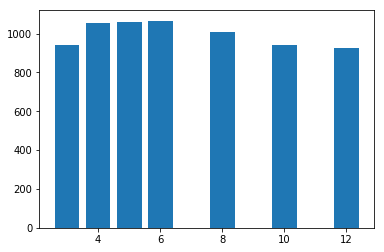

In [8]:
plt.bar(df2.CYLINDERS,range(len(df2.CYLINDERS)))

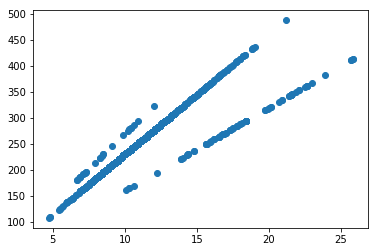

In [9]:
plt.scatter(df2.FUELCONSUMPTION_COMB,df2.CO2EMISSIONS)

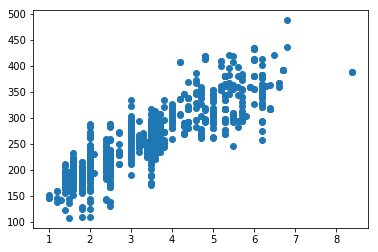

In [10]:
plt.scatter(df2.ENGINESIZE,df2.CO2EMISSIONS)

In [11]:
split = np.random.rand(len(df)) < 0.8

In [12]:
train = df2[split]
test = df2[~split]

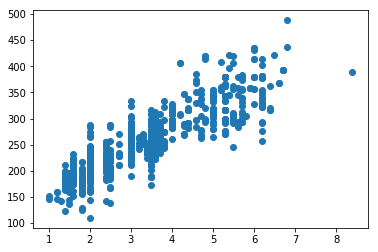

In [13]:
plt.scatter(train.ENGINESIZE,train.CO2EMISSIONS)

In [14]:
from sklearn import linear_model

In [15]:
regr = linear_model.LinearRegression()

In [16]:
train_x = np.asanyarray(train[['ENGINESIZE']])

In [17]:
train_y = np.asanyarray(train[['CO2EMISSIONS']])

In [18]:
regr.fit(train_x,train_y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

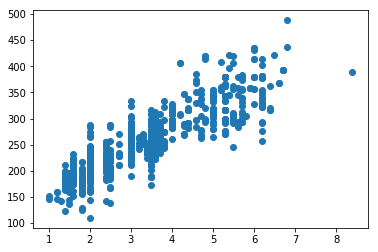

In [19]:
plt.scatter(train.ENGINESIZE,train.CO2EMISSIONS)

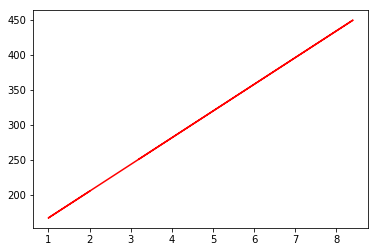

In [20]:
plt.plot(train_x, regr.coef_[0][0]*train_x + regr.intercept_[0], '-r')

In [21]:
test_x = np.asanyarray(test[['ENGINESIZE']])

In [22]:
test_y = np.asanyarray(test[['CO2EMISSIONS']])

In [26]:
y_pred = regr.predict(test_x)

In [36]:
D = pd.DataFrame({'Actual':list(test_y),'Predicted':list(y_pred)})

In [38]:
D

,Actual,Predicted
0,[221],[215.26960438749785]
1,[230],[261.9661314119128]
2,[255],[270.45640905271546]
3,[267],[270.45640905271546]
4,[212],[215.26960438749785]
5,[354],[312.907797256729]
6,[224],[240.74043730990599]
7,[258],[240.74043730990599]
8,[361],[380.8300183831507]
9,[239],[198.28904910589245]


In [44]:
print('Mean Absolute Error = ')
print(np.mean(np.absolute(y_pred-test_y)))

Mean Absolute Error = 
25.280229387380473


In [47]:
from sklearn.metrics import r2_score
r2_score(y_pred,test_y)

0.6967006077796245